# A Comparison of Early American and British Science Fiction Novels

## Code Contributed by Humaira Halim, Nick Kalinowski, Nikita Amanna

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Concat American Corpora

In [2]:
df1=pd.read_csv('/content/drive/My Drive/Text Analytics Final/humaira_acorpus.csv')
df2=pd.read_csv('/content/drive/My Drive/Text Analytics Final/nick_acorpus.csv')

In [3]:
df1.head()

,book_id,chap_id,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str
0,1164,1,0,0,0,"('I.', 'NN')",NN,I.,i
1,1164,1,0,1,0,"('MY', 'PRP$')",PRP$,MY,my
2,1164,1,0,1,1,"('EAGLE', 'NNP')",NNP,EAGLE,eagle
3,1164,1,0,1,2,"('II.', 'NNP')",NNP,II.,ii
4,1164,1,0,2,0,"('CHALLENGES', 'NNP')",NNP,CHALLENGES,challenges


In [4]:
df2.head()

,book_id,chap_id,para_num,sent_num,token_num,pos_tuple,pos,token_str,term_str
0,31547,1,0,0,0,"('The', 'DT')",DT,The,the
1,31547,1,0,0,1,"('Astronomer', 'NNP')",NNP,Astronomer,astronomer
2,31547,1,0,0,2,"('entered', 'VBD')",VBD,entered,entered
3,31547,1,0,0,3,"('the', 'DT')",DT,the,the
4,31547,1,0,0,4,"('dining', 'NN')",NN,dining,dining


In [4]:
CORPUS_AMERICA = pd.concat([df1, df2])
CORPUS_AMERICA = CORPUS_AMERICA.set_index(['book_id','chap_id','para_num','sent_num','token_num'])
CORPUS_AMERICA

pos_tuple   pos  \
book_id chap_id para_num sent_num token_num                                
1164    1       0        0        0                   ('I.', 'NN')    NN   
                         1        0                 ('MY', 'PRP$')  PRP$   
                                  1               ('EAGLE', 'NNP')   NNP   
                                  2                 ('II.', 'NNP')   NNP   
                         2        0          ('CHALLENGES', 'NNP')   NNP   
...                                                            ...   ...   
1633    4       51       1        35              ('little', 'JJ')    JJ   
                                  36              ('"world', 'NN')    NN   
                                  37                  ('of', 'IN')    IN   
                                  38               ('our', 'PRP$')  PRP$   
                                  39               ('own"?', 'NN')    NN   

                                              token_str    term_str  
book_id chap_id para_num sent_num token_num                          
1164    1       0        0        0                  I.           i  
                         1        0                  MY          my  
                                  1               EAGLE       eagle  
                                  2                 II.          ii  
                         2        0          CHALLENGES  challenges  
...                                                 ...         ...  
1633    4       51       1        35             little      little  
                                  36             "world       world  
                                  37                 of          of  
                                  38                our         our  
                                  39              own"?         own  

[301152 rows x 4 columns]

# Concat British Corpora

In [5]:
df3=pd.read_csv('/content/drive/My Drive/Text Analytics Final/nick_bcorpus.csv')
df4=pd.read_csv('/content/drive/My Drive/Text Analytics Final/nikita_corpus.csv')

In [6]:
CORPUS_BRITISH = pd.concat([df3, df4])
CORPUS_BRITISH = CORPUS_BRITISH.set_index(['book_id','chap_id','para_num','sent_num','token_num'])
CORPUS_BRITISH

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                               
36      1       0        0        0                  ('THE', 'DT')   DT   
                                  1                 ('EVE', 'NNP')  NNP   
                                  2                   ('OF', 'IN')   IN   
                                  3                 ('THE', 'NNP')  NNP   
                                  4                ('WAR.', 'NNP')  NNP   
...                                                            ...  ...   
18247   1       1241     8        39         ('Verney—the', 'NNP')  NNP   
                                  40               ('LAST', 'NNP')  NNP   
                                  41               ('MAN.', 'NNP')  NNP   
                1242     0        0                  ('THE', 'DT')   DT   
                                  1                ('END.', 'NNP')  NNP   

                                              token_str   term_str  
book_id chap_id para_num sent_num token_num                         
36      1       0        0        0                 THE        the  
                                  1                 EVE        eve  
                                  2                  OF         of  
                                  3                 THE        the  
                                  4                WAR.        war  
...                                                 ...        ...  
18247   1       1241     8        39         Verney—the  verneythe  
                                  40               LAST       last  
                                  41               MAN.        man  
                1242     0        0                 THE        the  
                                  1                END.        end  

[416624 rows x 4 columns]

In [7]:
american_tokens = CORPUS_AMERICA.reset_index().groupby('book_id')['token_num'].count().mean()

american_chaps = CORPUS_AMERICA.reset_index().groupby('book_id')['chap_id'].nunique().mean()

british_tokens = CORPUS_BRITISH.reset_index().groupby('book_id')['token_num'].count().mean()

british_chaps = CORPUS_BRITISH.reset_index().groupby('book_id')['chap_id'].nunique().mean()

british_pos = CORPUS_BRITISH.reset_index().groupby(['pos'])['term_str'].count().sort_values(ascending=False).index[0]

british_pos_count = CORPUS_BRITISH.reset_index().groupby(['pos'])['term_str'].count().sort_values(ascending=False)[0]

american_pos = CORPUS_AMERICA.reset_index().groupby(['pos'])['term_str'].count().sort_values(ascending=False).index[0]

american_pos_count = CORPUS_AMERICA.reset_index().groupby(['pos'])['term_str'].count().sort_values(ascending=False)[0]


chaps_list = [american_chaps, british_chaps]
tokens_list = [american_tokens, british_tokens]
max_pos = [american_pos, british_pos]
pos_count = [american_pos_count, british_pos_count]

corpora = ['American', 'British']

pd.DataFrame({'Corpus': corpora, 'Mean Number of Words by Book': tokens_list, 'Mean Number of Chapters By Book': chaps_list, 'Most Common Part of Speech': max_pos, 'Most Common Part of Speech Count': pos_count}).round(2).set_index('Corpus')

,Mean Number of Words by Book,Mean Number of Chapters By Book,Most Common Part of Speech,Most Common Part of Speech Count
Corpus,,,,
American,50192.00,18.67,NN,57162
British,69437.33,16.67,NN,82139


In [8]:
LIB_table = pd.DataFrame()

LIB_table['book_id'] = [36, 43, 1633, 31547, 201, 84, 5230, 18247, 10005, 25439, 1164, 32154]

LIB_table['book_title'] = ['The War of the Worlds', 'The Strange Case of Dr. Jekyll and Mr. Hyde', 'The Brick Moon', 'Youth', 'Flatland: A Romance of Many Dimensions', 'Frankenstein', 'The Invisible Man', 'The Last Man', 'A Voyage to the Moon', 'Looking Backward', 'The Iron Heel', 'The Variable Man']

LIB_table

,book_id,book_title
0,36,The War of the Worlds
1,43,The Strange Case of Dr. Jekyll and Mr. Hyde
2,1633,The Brick Moon
3,31547,Youth
4,201,Flatland: A Romance of Many Dimensions
5,84,Frankenstein
6,5230,The Invisible Man
7,18247,The Last Man
8,10005,A Voyage to the Moon
9,25439,Looking Backward


In [10]:
from google.colab import files


CORPUS_AMERICA.to_csv('american_corpus.csv', encoding = 'utf-8-sig') 
files.download('american_corpus.csv')

CORPUS_BRITISH.to_csv('british_corpus.csv', encoding = 'utf-8-sig') 
files.download('british_corpus.csv')

LIB_table.to_csv('library.csv', encoding = 'utf-8-sig') 
files.download('library.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## PCA

In [14]:
OHCO = ['book_id','chap_id','para_num','sent_num','token_num']


british_vocab = CORPUS_BRITISH.term_str.value_counts().to_frame('n').sort_index()

british_vocab.index.name = 'term_str'

british_vocab['max_pos'] = CORPUS_BRITISH[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)

american_vocab = CORPUS_AMERICA.term_str.value_counts().to_frame('n').sort_index()

american_vocab.index.name = 'term_str'

american_vocab['max_pos'] = CORPUS_AMERICA[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)



In [15]:
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
BOOKS = OHCO[:1]


def get_bow(corpus, bag):
    SENTS = OHCO[:4]
    PARAS = OHCO[:3]
    CHAPS = OHCO[:2]
    BOOKS = OHCO[:1]
    
    BOW = corpus.groupby(bag+['term_str']).term_str.count().to_frame('n')
    
    return BOW

idf_method = 'standard'   


def calc_tfidf(BOW, tf_method):
    DTCM = BOW.n.unstack().fillna(0).astype('int')
    DF = DTCM.astype('bool').sum()

    
    if tf_method == 'sum':
        TF = DTCM.T / DTCM.T.sum()
    elif tf_method == 'max':
        TF = DTCM.T / DTCM.T.max()
    elif tf_method == 'log':
        TF = np.log2(1 + DTCM.T)
    elif tf_method == 'raw':
        TF = DTCM.T
    elif tf_method == 'double_norm':
        TF = DTCM.T / DTCM.T.max()
    elif tf_method == 'binary':
        TF = DTCM.T.astype('bool').astype('int')
    TF = TF.T
    
        
    N = DTCM.shape[0]
    
    if idf_method == 'standard':
        IDF = np.log2(N / DF)
    elif idf_method == 'max':
        IDF = np.log2(DF.max() / DF) 
    elif idf_method == 'smooth':
        IDF = np.log2((1 + N) / (1 + DF)) + 1
        
 

    TFIDF = TF * IDF
    
    DFIDF = (DF * IDF)

    #bow_copy = BOW.copy()
    #bow_copy['tf'] = TF.stack()
    #bow_copy['tfidf'] = TFIDF.stack()
    #bow_copy['dfidf'] = DFIDF
    
    return TFIDF, DFIDF

### Chapter Bag

In [10]:
BOW_british = get_bow(CORPUS_BRITISH, CHAPS)

TFIDF, DFIDF = calc_tfidf(BOW_british, "max")

british_vocab['dfidf'] = DFIDF

BOW_america = get_bow(CORPUS_AMERICA, CHAPS)

TFIDF_a, DFIDF_a = calc_tfidf(BOW_america, "max")

american_vocab['dfidf'] = DFIDF_a

BOW_british['tfidf'] = TFIDF.stack()

BOW_america['tfidf'] = TFIDF_a.stack()

In [11]:
brit_tfidfs = TFIDF.reset_index().stack()[2:].groupby('term_str').mean()

british_vocab['tfidf'] = brit_tfidfs

american_tfidfs = TFIDF_a.reset_index().stack()[2:].groupby('term_str').mean()

american_vocab['tfidf'] = american_tfidfs

In [15]:
british_vocab.to_csv('british_vocab.csv', encoding = 'utf-8-sig') 
files.download('british_vocab.csv')

american_vocab.to_csv('american_vocab.csv', encoding = 'utf-8-sig') 
files.download('american_vocab.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
DOC_british = pd.DataFrame(index=TFIDF.index)
DOC_american = pd.DataFrame(index=TFIDF_a.index)


In [13]:
top_terms = british_vocab.sort_values('dfidf', ascending = False).head(1000)

top_terms = top_terms.index

reduced_TFIDF_british = TFIDF[top_terms]

reduced_TFIDF_british

term_str          feeling  understand  happened       ten   because  \
book_id chap_id                                                       
36      1        0.008438    0.000000  0.008438  0.008438  0.008438   
        2        0.000000    0.012694  0.000000  0.000000  0.000000   
        3        0.000000    0.000000  0.000000  0.000000  0.000000   
        4        0.000000    0.000000  0.000000  0.000000  0.000000   
        5        0.000000    0.000000  0.027322  0.000000  0.000000   
...                   ...         ...       ...       ...       ...   
5230    43       0.000000    0.024946  0.000000  0.012473  0.012473   
        44       0.005313    0.000000  0.005313  0.005313  0.000000   
        46       0.008800    0.000000  0.000000  0.000000  0.008800   
        47       0.000000    0.000000  0.031876  0.031876  0.000000   
18247   1        0.010509    0.002051  0.000256  0.001922  0.004998   

term_str         certainly   however  followed      cold     early  ...  \
book_id chap_id                                                     ...   
36      1         0.000000  0.000000  0.000000  0.000000  0.008438  ...   
        2         0.012694  0.012694  0.000000  0.000000  0.050775  ...   
        3         0.018874  0.000000  0.000000  0.000000  0.018874  ...   
        4         0.000000  0.000000  0.000000  0.000000  0.000000  ...   
        5         0.000000  0.000000  0.013661  0.000000  0.013661  ...   
...                    ...       ...       ...       ...       ...  ...   
5230    43        0.012473  0.000000  0.000000  0.000000  0.012473  ...   
        44        0.000000  0.000000  0.010625  0.005313  0.000000  ...   
        46        0.000000  0.008800  0.017600  0.000000  0.000000  ...   
        47        0.000000  0.000000  0.000000  0.000000  0.000000  ...   
18247   1         0.001025  0.005767  0.005896  0.008587  0.006664  ...   

term_str         strangers   express   retired     court  mrs   writing  \
book_id chap_id                                                           
36      1         0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
        2         0.000000  0.000000  0.000000  0.000000  0.0  0.023397   
        3         0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
        4         0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
        5         0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
...                    ...       ...       ...       ...  ...       ...   
5230    43        0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
        44        0.000000  0.000000  0.000000  0.000000  0.0  0.009792   
        46        0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
        47        0.000000  0.000000  0.000000  0.000000  0.0  0.000000   
18247   1         0.000472  0.003543  0.002599  0.001181  0.0  0.002126   

term_str           motion     brown      come     place  
book_id chap_id                                          
36      1        0.000000  0.000000  0.000000  0.003921  
        2        0.000000  0.000000  0.000000  0.000000  
        3        0.000000  0.000000  0.017541  0.000000  
        4        0.000000  0.025669  0.006472  0.006472  
        5        0.025180  0.025180  0.006348  0.000000  
...                   ...       ...       ...       ...  
5230    43       0.000000  0.000000  0.005796  0.000000  
        44       0.000000  0.000000  0.004938  0.000000  
        46       0.000000  0.000000  0.012268  0.000000  
        47       0.000000  0.058752  0.000000  0.000000  
18247   1        0.006142  0.000000  0.006849  0.004824  

[100 rows x 1000 columns]

In [14]:
top_terms_a = american_vocab.loc[(american_vocab['max_pos'] == 'NN') | (american_vocab['max_pos'] == 'NNS')].sort_values('dfidf', ascending = False).head(1000)

top_terms_a = top_terms_a.index

reduced_TFIDF_american = TFIDF_a[top_terms_a]

reduced_TFIDF_american

term_str             year       use     cause   morning      hope    return  \
book_id chap_id                                                               
1164    1        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        2        0.000000  0.026602  0.013301  0.000000  0.000000  0.012982   
        3        0.000000  0.000000  0.009601  0.000000  0.000000  0.004686   
        4        0.000000  0.008503  0.000000  0.000000  0.004150  0.004150   
        5        0.025324  0.000000  0.000000  0.006179  0.000000  0.006179   
...                   ...       ...       ...       ...       ...       ...   
31547   13       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
32154   1        0.000000  0.015155  0.000000  0.004930  0.019722  0.004930   
        2        0.000000  0.000000  0.003477  0.010180  0.006787  0.003393   
        3        0.000000  0.000000  0.000000  0.008063  0.000000  0.008063   
        4        0.000000  0.004215  0.000000  0.002057  0.006170  0.004113   

term_str            words        oh     sense      word  ...  races  concerns  \
book_id chap_id                                          ...                    
1164    1        0.000000  0.000000  0.000000  0.000000  ...    0.0       0.0   
        2        0.000000  0.000000  0.000000  0.000000  ...    0.0       0.0   
        3        0.004686  0.009837  0.000000  0.014756  ...    0.0       0.0   
        4        0.008299  0.008712  0.008712  0.008712  ...    0.0       0.0   
        5        0.012358  0.012973  0.000000  0.019460  ...    0.0       0.0   
...                   ...       ...       ...       ...  ...    ...       ...   
31547   13       0.000000  0.000000  0.000000  0.000000  ...    0.0       0.0   
32154   1        0.000000  0.000000  0.000000  0.005176  ...    0.0       0.0   
        2        0.006787  0.000000  0.007124  0.000000  ...    0.0       0.0   
        3        0.000000  0.004232  0.000000  0.000000  ...    0.0       0.0   
        4        0.002057  0.002159  0.000000  0.000000  ...    0.0       0.0   

term_str         career  excitement      roar   landing  livelihood  pure  \
book_id chap_id                                                             
1164    1           0.0    0.000000  0.000000  0.000000         0.0   0.0   
        2           0.0    0.000000  0.000000  0.000000         0.0   0.0   
        3           0.0    0.000000  0.000000  0.000000         0.0   0.0   
        4           0.0    0.000000  0.000000  0.000000         0.0   0.0   
        5           0.0    0.000000  0.000000  0.000000         0.0   0.0   
...                 ...         ...       ...       ...         ...   ...   
31547   13          0.0    0.000000  0.000000  0.000000         0.0   0.0   
32154   1           0.0    0.025348  0.000000  0.012674         0.0   0.0   
        2           0.0    0.017446  0.008723  0.000000         0.0   0.0   
        3           0.0    0.000000  0.010363  0.010363         0.0   0.0   
        4           0.0    0.010574  0.015861  0.005287         0.0   0.0   

term_str         choice     pulse  
book_id chap_id                    
1164    1           0.0  0.000000  
        2           0.0  0.000000  
        3           0.0  0.000000  
        4           0.0  0.000000  
        5           0.0  0.000000  
...                 ...       ...  
31547   13          0.0  0.000000  
32154   1           0.0  0.000000  
        2           0.0  0.017446  
        3           0.0  0.000000  
        4           0.0  0.005287  

[112 rows x 1000 columns]

In [15]:
from sklearn.decomposition import PCA
from scipy.linalg import norm
from scipy.linalg import eigh

def calc_pca(X, k, norm_docs, center_by_mean, center_by_variance):
    
    L2 = X
    if norm_docs == True:
        L2 = (L2.T / norm(L2, 2, axis=1)).T
    else:
        L2 = L2
    
    if center_by_mean == True:
        L2 = L2 - L2.mean()
    else:
        L2 = L2
    
    if center_by_variance == True:
        L2 = L2 - L2.var()
    else:
        L2 = L2
    
    COV = L2.T.dot(L2) / (L2.shape[0] - 1)
    
    eig_vals, eig_vecs = eigh(COV)
    
    EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
    EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
    EIG_VAL.index.name = 'term_str'
    
    EIG_VEC_PAIRS = EIG_VEC.stack().sort_values(ascending=False).to_frame('covariance')
    EIG_VEC_PAIRS.index.names = ['term1', 'term2']
    
    EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)
    EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)
    
    COMPS = EIG_PAIRS.sort_values('exp_var', ascending=False).head(k).reset_index(drop=True)
    COMPS.index.name = 'comp_id'
    COMPS.index = ["PC{}".format(i) for i in COMPS.index.tolist()]
    COMPS.index.name = 'pc_id'
    
    LOADINGS = COMPS[COV.index].T
    LOADINGS.index.name = 'term_str'
    
    DCM = L2.dot(COMPS[COV.index].T)
    
    LIB_COLS = ['genre_id', 'author_id']
    
    #DCM = DCM.join(LIB[LIB_COLS], on='book_id')
    
    #DCM['doc'] = DCM.apply(lambda x: f"{x.label} {str(x.name[1]).zfill(2)}", 1)
    
    COMPINF = COMPS
    
    return LOADINGS, DCM, COMPINF

In [18]:
#pip install plotly_express


In [19]:

LOADINGS, DCM, COMPINF = calc_pca(reduced_TFIDF_british, 10, True, False, False)

LOADINGS_a, DCM_a, COMPINF_a = calc_pca(reduced_TFIDF_american, 10, True, False, False)

import plotly_express as px
import seaborn as sns

sns.set(style = 'ticks')

DCM['origin'] = 'British'

DCM_a['origin'] = 'American'

new_dcm = DCM.reset_index()
new_dcm_a = DCM_a.reset_index()

new_dcm = new_dcm.merge(LIB_table, how='left')
new_dcm_a = new_dcm_a.merge(LIB_table, how='left')

total_dcm = pd.concat([new_dcm, new_dcm_a])

px.box(total_dcm, x='book_title', y='PC0', height=500, color='origin')


In [20]:
px.box(total_dcm, x='origin', y='PC0', height=500, color='origin')


In [21]:
stacked_dcm = pd.DataFrame(total_dcm.groupby('origin').mean().drop(['book_id', 'chap_id'], axis=1).stack())

stacked_dcm.index.names = ['Origin', 'Principle Component']

stacked_dcm = stacked_dcm.reset_index().rename(columns={0:'value'})

fig = px.bar(stacked_dcm, x="Principle Component", color="Origin",
             y='value',
             title="Mean Principle Component Values, Grouped by Book Origin",
             barmode='group',
             height=600
            )
fig.update_layout(yaxis_range=[-0.4,0.2])
fig.show()

<ipython-input-21-e20c11c3e998>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [90]:
LOADINGS.sort_values('PC0', ascending = False)
LOADINGS_a.sort_values('PC0', ascending = False)

COMPINF_a.head(5)

,eig_val,year,use,cause,morning,hope,return,words,oh,sense,...,concerns,career,excitement,roar,landing,livelihood,pure,choice,pulse,exp_var
pc_id,,,,,,,,,,,,,,,,,,,,,
PC0,0.122407,-0.053656,-0.042356,-0.033270,-0.049283,-0.033962,-0.044487,-0.038984,-0.035338,-0.037288,...,-0.017750,-0.015003,-0.012413,-0.018068,-0.020648,-0.013764,-0.016174,-0.020750,-0.010563,12.13
PC1,0.047202,0.007769,0.003950,0.012418,0.011836,-0.001859,-0.007500,0.002760,0.016876,0.013376,...,0.005115,0.003450,0.006975,0.018560,-0.016155,0.014702,0.005269,0.018299,0.006132,4.68
PC2,0.032545,-0.028789,-0.004963,0.002055,0.001056,0.015861,-0.004626,0.014252,0.048933,0.005574,...,-0.015545,-0.011800,0.013043,0.031339,0.060831,-0.025346,0.011792,-0.031974,0.012625,3.23
PC3,0.028145,-0.031786,-0.027388,0.032084,-0.034886,-0.002018,-0.007942,-0.034587,-0.039174,-0.043036,...,-0.019689,0.006379,0.009962,0.054148,-0.027177,-0.021467,-0.007569,-0.023778,0.008836,2.79
PC4,0.022753,0.005843,0.006798,0.020771,0.056961,0.000744,0.032520,0.020474,0.000419,0.038337,...,-0.006491,0.001387,0.005883,0.022811,-0.053696,-0.010388,0.027422,-0.022244,0.012586,2.26


In [44]:
COMPINF.to_csv('british_components.csv', encoding = 'utf-8-sig') 
files.download('british_components.csv')

COMPINF_a.to_csv('american_components.csv', encoding = 'utf-8-sig') 
files.download('american_components.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
LOADINGS.to_csv('british_loadings.csv', encoding = 'utf-8-sig') 
files.download('british_loadings.csv')

LOADINGS_a.to_csv('american_loadings.csv', encoding = 'utf-8-sig') 
files.download('american_loadings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Sentiment Analysis

In [45]:
syuzhet=pd.read_csv('/content/drive/My Drive/Text Analytics Final/salex_syuzhet.csv')

syuzhet.dtypes

syuz_british = british_vocab.reset_index().merge(syuzhet).drop('n', axis=1)

syuz_american = american_vocab.reset_index().merge(syuzhet).drop('n', axis=1)

bow_brit = BOW_british.reset_index()

bow_amer = BOW_america.reset_index()

new_bow = bow_brit.merge(syuz_british, on='term_str').dropna().set_index(['book_id', 'chap_id', 'term_str'])

new_bow['origin'] = 'British'

new_bow_a = bow_amer.merge(syuz_american, on='term_str').dropna().set_index(['book_id', 'chap_id', 'term_str'])

new_bow_a['origin'] = 'American'

total_bow = pd.concat([new_bow, new_bow_a])

In [46]:
total_bow

n   tfidf_x max_pos      dfidf   tfidf_y  \
book_id chap_id term_str                                              
36      1       abundance  1  0.033199      NN  11.287712  0.000421   
201     2       abundance  2  0.008909      NN  11.287712  0.000421   
36      1       admits     1  0.033199     VBZ  11.287712  0.001586   
5230    47      admits     1  0.125419     VBZ  11.287712  0.001586   
36      1       advance    1  0.016685      NN  39.711018  0.003051   
...                       ..       ...     ...        ...       ...   
32154   4       unsteady   1  0.009894      JJ   6.807355  0.000088   
                untouched  1  0.009894     NNP   6.807355  0.000088   
                warily     1  0.009894      RB   6.807355  0.000088   
                withering  1  0.009894      NN   6.807355  0.000088   
                yanked     2  0.019789     VBN   6.807355  0.000177   

                           syu_sentiment    origin  
book_id chap_id term_str                            
36      1       abundance            0.6   British  
201     2       abundance            0.6   British  
36      1       admits               0.6   British  
5230    47      admits               0.6   British  
36      1       advance              0.8   British  
...                                  ...       ...  
32154   4       unsteady            -0.8  American  
                untouched           -0.5  American  
                warily              -1.0  American  
                withering           -1.0  American  
                yanked              -0.4  American  

[46917 rows x 7 columns]

In [47]:
# Weight by TFIDF

total_bow['weighted_sentiment'] = total_bow['tfidf_x'] * total_bow['syu_sentiment']

total_bow = total_bow.reset_index().merge(LIB_table, how='left')

sentiment_df = pd.DataFrame(total_bow.groupby('origin')['weighted_sentiment'].mean()).reset_index()

book_df = pd.DataFrame(total_bow.groupby(['book_title', 'origin'])['weighted_sentiment'].mean()).reset_index()

fig = px.bar(sentiment_df, x="origin", color="origin",
             y='weighted_sentiment',
             title="Mean Syuzhet Sentiment Values, Grouped by Book Origin",
             barmode='group',
             height=600
            )
fig.show()

In [48]:
fig = px.bar(book_df, x="book_title", color="origin",
             y='weighted_sentiment',
             title="Mean Syuzhet Sentiment Values, Grouped by Book",
             barmode='group',
             height=600
            )
fig.show()

In [27]:
px.box(book_df, x='origin', y='weighted_sentiment', height=500, color='origin')

In [60]:
bow_csv = total_bow.drop(['tfidf_y', 'book_id', 'chap_id', 'book_title'], axis = 1).groupby('term_str').mean()

bow_csv.to_csv('vocab_sentiment.csv', encoding = 'utf-8-sig') 
files.download('vocab_sentiment.csv')

book_df.to_csv('book_sentiment.csv', encoding = 'utf-8-sig') 
files.download('book_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
bow_csv.head(5)

,n,tfidf_x,dfidf,syu_sentiment,weighted_sentiment
term_str,,,,,
abandon,1.000000,0.033480,9.794260,-0.75,-0.025110
abandoned,1.631579,0.020196,33.498984,-0.50,-0.010098
abandonment,2.000000,0.025295,11.287712,-0.25,-0.006324
aberration,1.000000,0.022541,6.807355,-0.80,-0.018033
abhor,1.666667,0.062216,15.176681,-0.50,-0.031108


In [93]:
book_df

,book_title,origin,weighted_sentiment
0,A Voyage to the Moon,American,0.002086
1,Flatland: A Romance of Many Dimensions,British,0.001174
2,Frankenstein,British,0.000557
3,Looking Backward,American,0.002261
4,The Brick Moon,American,0.001469
5,The Invisible Man,British,-0.004026
6,The Iron Heel,American,-0.002713
7,The Last Man,British,-0.000055
8,The Strange Case of Dr. Jekyll and Mr. Hyde,British,-0.001280
9,The Variable Man,American,-0.002144


### Word2Vec

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
! pip install plotly_express
import plotly_express as px
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
TOKENS_brit = CORPUS_BRITISH

TOKENS_amer = CORPUS_AMERICA


In [16]:
DOCS_brit = TOKENS_brit[~TOKENS_brit.pos.str.match('NNPS?')]\
    .groupby(PARAS)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS_brit = [doc for doc in DOCS_brit if len(doc) > 1] 

DOCS_amer = TOKENS_amer[~TOKENS_amer.pos.str.match('NNPS?')]\
    .groupby(PARAS)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS_amer = [doc for doc in DOCS_amer if len(doc) > 1] 

In [17]:
brit_w2v = word2vec.Word2Vec(DOCS_brit, vector_size=256, window=2, min_count=50)

amer_w2v = word2vec.Word2Vec(DOCS_amer, vector_size=256, window=2, min_count=50)

brit_coords = pd.DataFrame(dict(vector = [brit_w2v.wv.get_vector(w) for w in brit_w2v.wv.key_to_index], term_str = brit_w2v.wv.key_to_index.keys())).set_index('term_str')
brit_coords = brit_coords.merge(british_vocab.reset_index(), on="term_str")

amer_coords = pd.DataFrame(dict(vector = [amer_w2v.wv.get_vector(w) for w in amer_w2v.wv.key_to_index], term_str = amer_w2v.wv.key_to_index.keys())).set_index('term_str')
amer_coords = brit_coords.merge(american_vocab.reset_index(), on="term_str")

tsne_engine = TSNE(learning_rate = 200, perplexity = 20, n_components = 2, init = 'pca', n_iter = 1000, random_state = 42)

In [18]:
british_vectors = np.array(brit_coords.vector.to_list())
brit_tsne_model = tsne_engine.fit_transform(british_vectors)
brit_coords['x'] = brit_tsne_model[:,0]
brit_coords['y'] = brit_tsne_model[:,1]

american_vectors = np.array(amer_coords.vector.to_list())
amer_tsne_model = tsne_engine.fit_transform(american_vectors)
amer_coords['x'] = amer_tsne_model[:,0]
amer_coords['y'] = amer_tsne_model[:,1]


In [19]:
if brit_coords.shape[1] == 3:
    brit_coords = brit_coords.merge(british_vocab.reset_index(), on='term_str')
    brit_coords = brit_coords.set_index('term_str')

if amer_coords.shape[1] == 3:
    amer_coords = amer_coords.merge(american_vocab.reset_index(), on='term_str')
    amer_coords = amer_coords.set_index('term_str')

In [22]:
def complete_analogy(model, A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(model, positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

In [27]:
get_most_similar(brit_w2v, 'human')

,term,sim
0,being,0.943477
1,dead,0.926318
2,either,0.923136
3,most,0.920552
4,sense,0.919439
5,nature,0.912631
6,higher,0.906983
7,greater,0.901051
8,state,0.896050
9,common,0.893411


In [28]:
get_most_similar(amer_w2v, 'human')

,term,sim
0,state,0.994891
1,different,0.993967
2,various,0.993782
3,common,0.993342
4,national,0.993303
5,political,0.992856
6,public,0.992710
7,force,0.992453
8,private,0.992325
9,means,0.992183


In [32]:
complete_analogy(brit_w2v, 'hand', 'feet', 'man')

,term,sim
0,few,0.821180
1,one,0.820658


In [31]:
complete_analogy(amer_w2v, 'hand', 'feet', 'man')

,term,sim
0,fact,0.884997
1,few,0.860592


In [99]:
px.scatter(brit_coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

In [100]:
px.scatter(amer_coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos_x', 
           hover_name='term_str',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

In [101]:
brit_coords = brit_coords.set_index('term_str')
amer_coords = amer_coords.set_index('term_str')



In [102]:
brit_coords

,vector,n,max_pos,dfidf,tfidf,doc_count,x,y
term_str,,,,,,,,
the,"[-0.23268822, 0.026945636, 0.021772387, 0.5248...",27121,DT,1.435457,0.014207,NaN,-36.019726,7.177570
of,"[-0.045240235, -0.16870664, -0.20432879, 0.067...",15688,IN,0.000000,0.000000,NaN,-16.767942,42.272179
and,"[0.03204688, -0.10693634, 0.015306312, 0.14601...",15607,CC,1.435457,0.008720,NaN,-23.832308,33.048309
to,"[0.10242264, -0.053659175, 0.15902817, -0.1795...",10969,TO,2.856342,0.010611,NaN,37.790169,-32.306572
i,"[-0.058211155, 0.0043245135, 0.0499153, -0.065...",9204,PRP,7.030055,0.029913,NaN,26.069798,-39.631302
...,...,...,...,...,...,...,...,...
marked,"[-0.062223643, -0.09766078, -0.04285508, 0.114...",50,VBD,43.458687,0.003049,NaN,-19.718153,8.870566
surely,"[-0.0038011468, -0.0657868, -0.029651225, 0.05...",52,RB,48.057341,0.003122,18.0,26.349030,-19.760075
kindness,"[-0.00039473592, -0.064795494, 0.013967279, 0....",50,NN,45.522645,0.005228,21.0,10.421763,-12.159806


In [42]:
from google.colab import files

brit_coords.to_csv('british_embeddings.csv', encoding = 'utf-8-sig') 
files.download('british_embeddings.csv')

amer_coords.to_csv('american_embeddings.csv', encoding = 'utf-8-sig') 
files.download('american_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### LDA

In [33]:
#ngram_range = [1,2]
TOKENS_brit[TOKENS_brit["term_str"].apply(lambda x: isinstance(x, float))]

TOKENS_brit['term_str'] = TOKENS_brit['token_str'].str.lower().str.replace(r'[\W_]', '', regex=True).dropna()

TOKENS_amer[TOKENS_amer["term_str"].apply(lambda x: isinstance(x, float))]

TOKENS_amer['term_str'] = TOKENS_amer['token_str'].str.lower().str.replace(r'[\W_]', '', regex=True).dropna()


DOCS_brit2 = TOKENS_brit[TOKENS_brit.pos.str.match(r'^NNS?$')]\
    .groupby(PARAS).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})

DOCS_amer2 = TOKENS_amer[TOKENS_amer.pos.str.match(r'^NNS?$')]\
    .groupby(PARAS).term_str\
    .apply(lambda x: ' '.join(x))\
    .to_frame()\
    .rename(columns={'term_str':'doc_str'})


n_terms = 4000
n_topics = 10
max_iter = 20
n_top_terms = 9

count_engine = CountVectorizer(max_features=n_terms, ngram_range=(1,2), stop_words='english')
count_model_brit = count_engine.fit_transform(DOCS_brit2.doc_str)
count_model_amer = count_engine.fit_transform(DOCS_amer2.doc_str)

TERMS = count_engine.get_feature_names_out()

DTM_brit = pd.DataFrame(count_model_brit.toarray(), index=DOCS_brit2.index, columns=TERMS)
DTM_amer = pd.DataFrame(count_model_amer.toarray(), index=DOCS_amer2.index, columns=TERMS)

british_vocab['doc_count'] = DTM_brit.astype('bool').astype('int').sum()
DOCS_brit2['term_count'] = DTM_brit.sum(1)

american_vocab['doc_count'] = DTM_amer.astype('bool').astype('int').sum()
DOCS_amer2['term_count'] = DTM_amer.sum(1)

In [34]:
DOCS_amer2

doc_str  \
book_id chap_id para_num                                                      
1164    1       0         i x xi xii xiii xiv beginning xv end xvii xvii...   
                2         first stage woe shifting scenes patient playwr...   
        2       1         document errors fact errors interpretation cen...   
                2         document value error perspective vitiation bia...   
                3         man wife all number heroes world lives work el...   
...                                                                     ...   
32154   4       342                                                frowning   
                343                                        of course detail   
                344                                              whats that   
                345       i havent model bugs work line door well talk s...   
                346                   wasnt listening bent schematics frown   

                          term_count  
book_id chap_id para_num              
1164    1       0                  2  
                2                  5  
        2       1                 10  
                2                 11  
                3                 18  
...                              ...  
32154   4       342                0  
                343                1  
                344                1  
                345                7  
                346                1  

[4494 rows x 2 columns]

In [35]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

TNAMES = [f"T{str(x).zfill(len(str(n_topics)))}" for x in range(n_topics)]

lda_model_brit = lda_engine.fit_transform(count_model_brit)
lda_model_amer = lda_engine.fit_transform(count_model_amer)

THETA_brit = pd.DataFrame(lda_model_brit, index=DOCS_brit2.index)
THETA_brit.columns.name = 'topic_id'
THETA_brit.columns = TNAMES

THETA_amer = pd.DataFrame(lda_model_amer, index=DOCS_amer2.index)
THETA_amer.columns.name = 'topic_id'
THETA_amer.columns = TNAMES

PHI = pd.DataFrame(lda_engine.components_, columns=TERMS, index=TNAMES)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [36]:
TOPICS = PHI.stack().to_frame('topic_weight').groupby('topic_id')\
    .apply(lambda x: x.sort_values('topic_weight', ascending=False)\
        .head(n_top_terms).reset_index().drop('topic_id', axis=1)['term_str'])
    

TOPICS['label'] = TOPICS.apply(lambda x: x.name + ' ' + ', '.join(x[:n_top_terms]), 1)

In [37]:
TOPICS['doc_weight_sum_brit'] = THETA_brit.sum()
TOPICS['doc_weight_sum_amer'] = THETA_amer.sum()
TOPICS['term_freq'] = PHI.sum(1) / PHI.sum(1).sum()

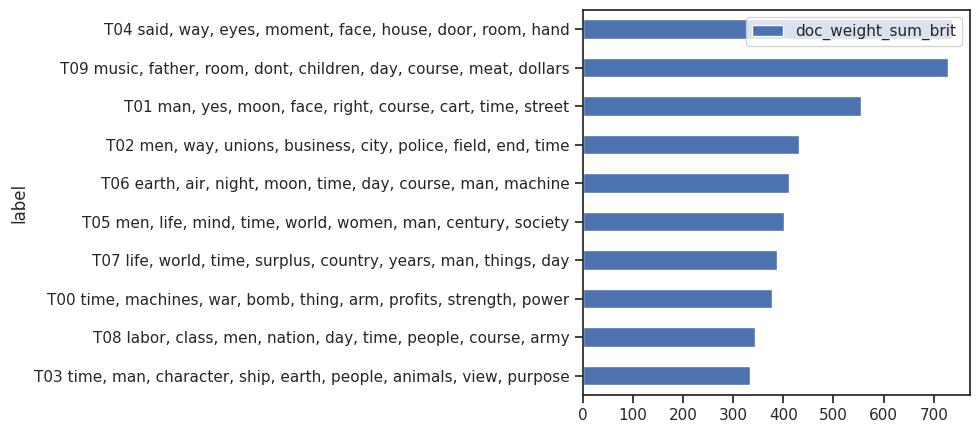

In [65]:
TOPICS.sort_values('doc_weight_sum_brit', ascending=True).plot.barh(y='doc_weight_sum_brit', x='label', figsize=(5, n_topics/2));

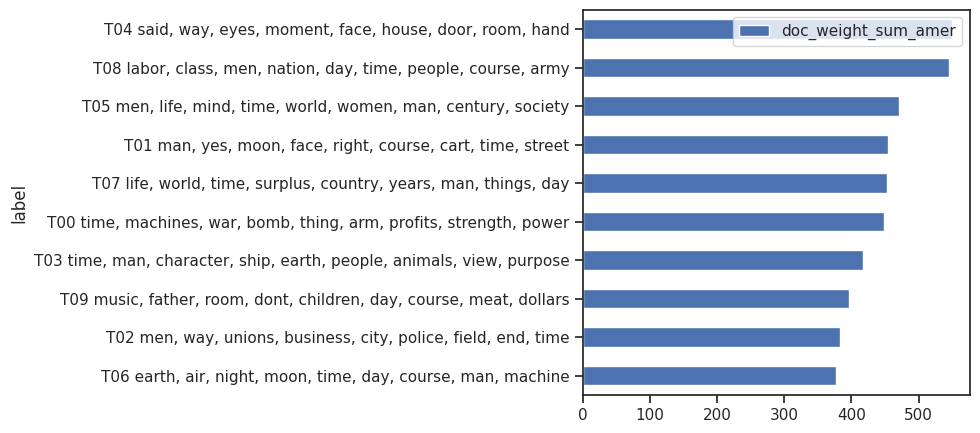

In [66]:
TOPICS.sort_values('doc_weight_sum_amer', ascending=True).plot.barh(y='doc_weight_sum_amer', x='label', figsize=(5, n_topics/2));

In [67]:
fig = px.scatter(TOPICS, x='doc_weight_sum_brit', y='term_freq', color = TOPICS.index)

fig.show()

In [68]:
fig = px.scatter(TOPICS, x='doc_weight_sum_amer', y='term_freq', color = TOPICS.index)

fig.show()

In [40]:
colors = "YlGnBu"
THETA_brit.sample(20).style.background_gradient(cmap=colors, axis=None)

,,,T00,T01,T02,T03,T04,T05,T06,T07,T08,T09
book_id,chap_id,para_num,,,,,,,,,,
18247,1,1004,0.464824,0.003573,0.003572,0.506599,0.003572,0.003572,0.003572,0.003572,0.003572,0.003572
36,13,46,0.007693,0.007695,0.007696,0.007693,0.495148,0.007693,0.443304,0.007693,0.007693,0.007692
18247,1,1124,0.002632,0.002632,0.002632,0.002632,0.002632,0.002633,0.297608,0.002632,0.681335,0.002633
201,4,47,0.007144,0.007144,0.007145,0.935702,0.007145,0.007145,0.007144,0.007144,0.007144,0.007143
36,24,21,0.004762,0.676499,0.004763,0.004763,0.004763,0.004763,0.004763,0.004762,0.073617,0.216544
43,16,28,0.020003,0.819969,0.020009,0.020000,0.020003,0.020002,0.020003,0.020002,0.020003,0.020006
84,48,4,0.011113,0.011113,0.011114,0.391814,0.011112,0.011113,0.011116,0.011113,0.519280,0.011112
5230,4,2,0.020001,0.020001,0.020001,0.020001,0.819989,0.020001,0.020001,0.020000,0.020003,0.020001
36,16,7,0.008336,0.681158,0.008335,0.008334,0.252161,0.008335,0.008335,0.008336,0.008336,0.008335


In [41]:
THETA_amer.sample(20).style.background_gradient(cmap=colors, axis=None)

In [44]:
from google.colab import files

THETA_brit.to_csv('british_theta.csv', encoding = 'utf-8-sig') 
files.download('british_theta.csv')

THETA_amer.to_csv('american_theta.csv', encoding = 'utf-8-sig') 
files.download('american_theta.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
TOPICS.to_csv('topics.csv', encoding = 'utf-8-sig') 
files.download('topics.csv')

PHI.to_csv('phi.csv', encoding = 'utf-8-sig') 
files.download('phi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,label,doc_weight_sum_brit,doc_weight_sum_amer,term_freq
topic_id,,,,,,,,,,,,,
T00,time,machines,war,bomb,thing,arm,profits,strength,power,"T00 time, machines, war, bomb, thing, arm, pro...",378.109726,449.174710,0.084991
T01,man,yes,moon,face,right,course,cart,time,street,"T01 man, yes, moon, face, right, course, cart,...",555.572819,453.850712,0.087050
T02,men,way,unions,business,city,police,field,end,time,"T02 men, way, unions, business, city, police, ...",430.531701,382.719162,0.078139
T03,time,man,character,ship,earth,people,animals,view,purpose,"T03 time, man, character, ship, earth, people,...",333.707401,416.677801,0.106834
T04,said,way,eyes,moment,face,house,door,room,hand,"T04 said, way, eyes, moment, face, house, door...",735.548275,548.967858,0.097493
T05,men,life,mind,time,world,women,man,century,society,"T05 men, life, mind, time, world, women, man, ...",401.938690,471.378629,0.122915
T06,earth,air,night,moon,time,day,course,man,machine,"T06 earth, air, night, moon, time, day, course...",412.153068,377.037643,0.091730
T07,life,world,time,surplus,country,years,man,things,day,"T07 life, world, time, surplus, country, years...",387.030376,453.453567,0.095354
T08,labor,class,men,nation,day,time,people,course,army,"T08 labor, class, men, nation, day, time, peop...",342.845734,545.043375,0.164424


In [54]:
colors = "YlGnBu"
THETA_amer.sample(20).style.background_gradient(cmap=colors, axis=None)

In [107]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,label,doc_weight_sum_brit,doc_weight_sum_amer,term_freq
topic_id,,,,,,,,,,,,,
T00,time,machines,war,bomb,thing,arm,profits,strength,power,"T00 time, machines, war, bomb, thing, arm, pro...",378.109726,449.174710,0.084991
T01,man,yes,moon,face,right,course,cart,time,street,"T01 man, yes, moon, face, right, course, cart,...",555.572819,453.850712,0.087050
T02,men,way,unions,business,city,police,field,end,time,"T02 men, way, unions, business, city, police, ...",430.531701,382.719162,0.078139
T03,time,man,character,ship,earth,people,animals,view,purpose,"T03 time, man, character, ship, earth, people,...",333.707401,416.677801,0.106834
T04,said,way,eyes,moment,face,house,door,room,hand,"T04 said, way, eyes, moment, face, house, door...",735.548275,548.967858,0.097493
T05,men,life,mind,time,world,women,man,century,society,"T05 men, life, mind, time, world, women, man, ...",401.938690,471.378629,0.122915
T06,earth,air,night,moon,time,day,course,man,machine,"T06 earth, air, night, moon, time, day, course...",412.153068,377.037643,0.091730
T07,life,world,time,surplus,country,years,man,things,day,"T07 life, world, time, surplus, country, years...",387.030376,453.453567,0.095354
T08,labor,class,men,nation,day,time,people,course,army,"T08 labor, class, men, nation, day, time, peop...",342.845734,545.043375,0.164424
